# Fake News Prediction Project

For this project, I used the train.csv dataset, which can be found here: [train.csv](https://www.kaggle.com/c/fake-news/data?select=train.csv)

train.csv is a full training dataset with the following attributes:


*   **id** - unique id for a news article
*   **title** - the title of a news article
*   **author** - author of the news article
*   **text** - the text of the article; could be incomplete
*   **label** - a label that marks the article as potentially unreliable (1: unreliable, 0: reliable)









Importing the dependencies

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


Stopwords are common words in a language that are typically filtered out from text data during natural language processing. These words do not carry much meaning on their own and are often used to connect other words in a sentence.



In [ ]:
#printing the english stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Loading the dataset

In [ ]:
newsData = pd.read_csv('/content/train.csv')
newsData

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
newsData.shape

(20800, 5)

As we can see, our dataset has 20800 rows and 5 columns

In [ ]:
#counting the number of missing values in the dataset
newsData.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

The output indicates that:


*   The 'id' column has no missing values
*   The 'title' column has 558 missing values
*   The 'author' column has 1957 missing values
*   The 'text' column has 39 missing values
*   The 'label' column has no missing values



In [ ]:
#replacing the null values with an empty string
newsData = newsData.fillna('')

In [ ]:
newsData['content'] = newsData['author'] + ' ' + newsData['title']
newsData['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [ ]:
#separating the data and label
data = newsData.drop(columns='label', axis=1)
label = newsData['label']

In [ ]:
newsContentData = newsData['content']

Stemming is a text normalization technique used in natural language processing to reduce words to their base or root form, called a stem. This is done by removing the suffixes of prefixes from a word. The resulting stem may not be a valid word itself, but it can be used to group together similar words with the same stem, which can aid in text analysis and information retrieval tasks.

We're going to use 'SnowballStemmer', which is a stemming library in Python that is used to reduce words to their base or root form. It is part of the Natural Language Toolkit (NLTK) and is based on the Snowball stemming algorithm.

In [ ]:
def stemming(content):
  stemmer = SnowballStemmer(language='english')
  stemmed_tokens = []
  for token in content.split():
    stemmed_tokens.append(stemmer.stem(token))
  stemmed_content = " ".join(stemmed_tokens)
  return stemmed_content

In [ ]:
newsContentData = newsContentData.apply(stemming)

In [ ]:
print(newsContentData)

0        darrel lucus hous dem aide: we didn't even see...
1        daniel j. flynn flynn: hillari clinton, big wo...
2        consortiumnews.com whi the truth might get you...
3        jessica purkiss 15 civilian kill in singl us a...
4        howard portnoy iranian woman jail for fiction ...
                               ...                        
20795    jerom hudson rapper t.i.: trump a poster child...
20796    benjamin hoffman n.f.l. playoffs: schedule, ma...
20797    michael j. de la merc and rachel abram maci is...
20798    alex ansari nato, russia to hold parallel exer...
20799                david swanson what keep the f-35 aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
data = newsContentData.values
label = newsData['label'].values

In [ ]:
print(data)

["darrel lucus hous dem aide: we didn't even see comey letter until jason chaffetz tweet it"
 'daniel j. flynn flynn: hillari clinton, big woman on campus - breitbart'
 'consortiumnews.com whi the truth might get you fire' ...
 'michael j. de la merc and rachel abram maci is said to receiv takeov approach by hudson bay - the new york time'
 'alex ansari nato, russia to hold parallel exercis in balkan'
 'david swanson what keep the f-35 aliv']


In [ ]:
print(label)
label.shape

[1 0 1 ... 0 1 1]


(20800,)

'TfidfVectorizer' is a text preprocessing tool in the 'sklearn.feature_extraction.text' module that is used to convert a collection of raw documents into a numerical feature matrix.

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data)

data = vectorizer.transform(data)

In [ ]:
print(data)

  (0, 19446)	0.18513179632996182
  (0, 18833)	0.27292246921689084
  (0, 18512)	0.25342931357697235
  (0, 15970)	0.22026216190300366
  (0, 10748)	0.31058147339899256
  (0, 10442)	0.2495312426118576
  (0, 9407)	0.21171360352527424
  (0, 9312)	0.14981025066923848
  (0, 8585)	0.1898210532228285
  (0, 6249)	0.19929771365054014
  (0, 5113)	0.25342931357697235
  (0, 4861)	0.2329910273166481
  (0, 4638)	0.30741885654065226
  (0, 3858)	0.21085327543636695
  (0, 3320)	0.31404572821082616
  (0, 810)	0.347350298440895
  (1, 19788)	0.2984484850097676
  (1, 12759)	0.15936029925880085
  (1, 8365)	0.19133217782924253
  (1, 6885)	0.7089401776361209
  (1, 4602)	0.26278262442617073
  (1, 3685)	0.189624759720497
  (1, 3029)	0.3641932789948744
  (1, 2654)	0.15404857919732357
  (1, 2215)	0.2914595214756064
  :	:
  (20797, 9271)	0.12679343247977795
  (20797, 8625)	0.21052430990528523
  (20797, 4688)	0.2068180932901781
  (20797, 2924)	0.1464071242989423
  (20797, 1981)	0.32389377616190745
  (20797, 1303)	0.29

'train_test_split' is a function provided by the Python machine learning library scikit-learn that is used for splitting a dataset into two subsets: a training set and a test set.

It is important to evaluate the performance of the model on new data that was not used during training, so that we can estimate how well the model will generalize to new, unseen data. To achieve this, we split the original dataset into two subsets: the training set, which is used to train the model, and the test set, which is used to evaluate the performance of the trained model.

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(data,label, test_size=0.2, stratify=label, random_state=2)

We have set 'test_size=0.2', so 'train_test_split' will split the dataset into a training set containing 80% of the data and a test set containing 20% of the data

**Training the model: Logistic Regression**


Logistic Regression is a popular statistical model used for classification tasks in machine learning. The goal of logistic regression is to predict the probability that an input data point belongs to a particular class.

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(data_train, label_train)

LogisticRegression()

**Accuracy score**

The 'accuracy_score' function is a performance metric in machine learning that measures the accuracy of a classification model. Specifically, it calculates the proportion of correctly predicted labels out of the total number of labels in the test data.

In [ ]:
#accuracy score on the training data
data_train_prediction = model.predict(data_train)
training_accuracy = accuracy_score(data_train_prediction, label_train)

In [ ]:
print('Accuracy score of the training data is ', training_accuracy)

Accuracy score of the training data is  0.9862980769230769


The accuracy score is a useful metric for evaluating the performance of a classification model, but it should be used in conjunction with other metrics, such as precision, recall, and F1 score, to get a more comprehensive picture of the model's performance.


1.   Precision - Precision measures the proportion of true positives out of the total predicted positives
2.   Recall - Recall measures the proportion of true positives out of the total actual positives
3.   F1 Score - The F1 Score is a weighted average of precision and recall



In [ ]:
training_precision = precision_score(data_train_prediction, label_train)
training_recall = recall_score(data_train_prediction, label_train)
training_f1 = f1_score(data_train_prediction, label_train)

In [ ]:
print('Precision score of the training data is ', training_precision)

Precision score of the training data is  0.9943577430972389


In [ ]:
print('Recall score of the training data is ', training_recall)

Recall score of the training data is  0.9786153119092628


In [ ]:
print('F1 score of the training data is ', training_f1)

F1 score of the training data is  0.986423722758128


In [ ]:
#accuracy score on the test data
data_test_prediction = model.predict(data_test)
test_accuracy = accuracy_score(data_test_prediction, label_test)

In [ ]:
print('Accuracy score of the test data is ',test_accuracy)

Accuracy score of the test data is  0.9776442307692308


In [ ]:
test_precision = precision_score(data_test_prediction, label_test)
test_recall = recall_score(data_test_prediction, label_test)
test_f1 = f1_score(data_test_prediction, label_test)

In [ ]:
print('Precision score of the test data is ', test_precision)

Precision score of the test data is  0.9932789246279404


In [ ]:
print('Recall score of the test data is ', test_recall)

Recall score of the test data is  0.9632216014897579


In [ ]:
print('F1 score of the test data is ', test_f1)

F1 score of the test data is  0.9780193807610493


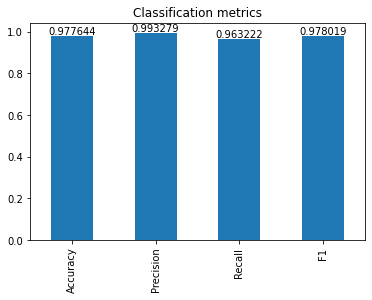

In [ ]:
# Visualize metrics
metrics = pd.DataFrame({"Accuracy": test_accuracy,
                           "Precision": test_precision,
                           "Recall": test_recall,
                           "F1": test_f1},
                            index=[0])
metrics_bar = metrics.T.plot.bar(title="Classification metrics", legend=False)

for b in metrics_bar.containers:
    metrics_bar.bar_label(b, label_type='edge')

plt.show()

In [ ]:
# Show how each feature contributes to the label
model.coef_

array([[-0.03810481,  0.02131129,  0.14160652, ...,  0.09158363,
         0.16759511,  0.05314319]])

In [ ]:
# Match coef's of features to columns
features_dict = dict(zip(newsData.columns, list(model.coef_[0])))
features_dict

{'id': -0.03810480559471624,
 'title': 0.02131128743298299,
 'author': 0.1416065246489042,
 'text': 0.11033162792950219,
 'label': 0.07131755645708518,
 'content': 0.03509976727659578}

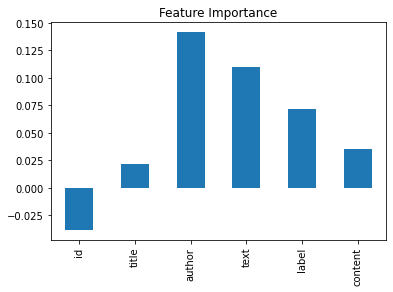

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

**Making a predictive system**

In [ ]:
data_new = data_test[3]
prediction = model.predict(data_new)
print(prediction)

[0]


In [ ]:
if(prediction[0]==0):
  print('The news is real')
else:
  print('The news is fake')

The news is real
